In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import cv2

In [3]:
#read image
img= cv2.imread("./test_images/elon.jpg")
img.shape

(1200, 1200, 3)

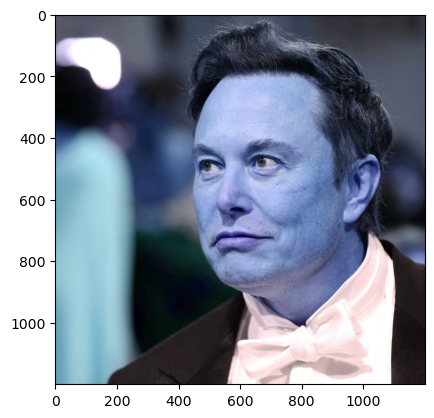

In [4]:
plt.imshow(img)

In [5]:
#convert RGB image to gray image
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(1200, 1200)

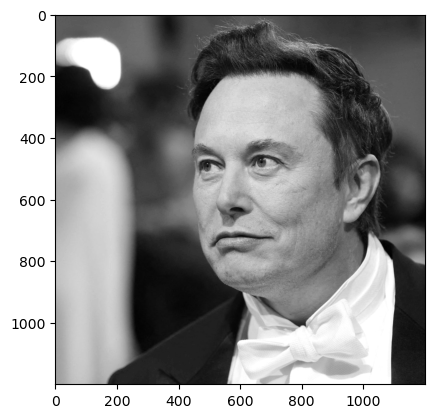

In [6]:
plt.imshow(gray, cmap='gray')

In [7]:
#detect face and eyes using Haar Cascade Classifier
face_cascade= cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')
faces= face_cascade.detectMultiScale(gray, 1.5, 5)
faces  #this var return the x, y, width and heigh of the gray image

array([[313, 253, 615, 615]])

In [8]:
#show values of X, y, width and heigh
[x, y, w, h]= faces[0]
x, y, w, h


(313, 253, 615, 615)

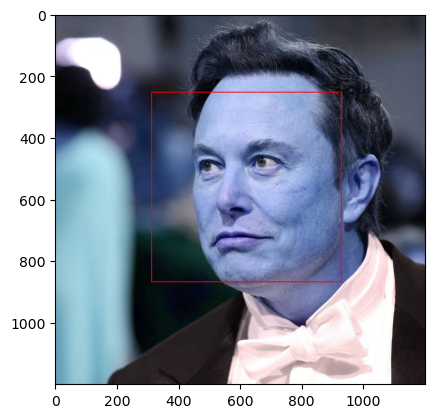

In [9]:
# draw a rectangle and put the cropped face in it
face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
plt.imshow(face_img)

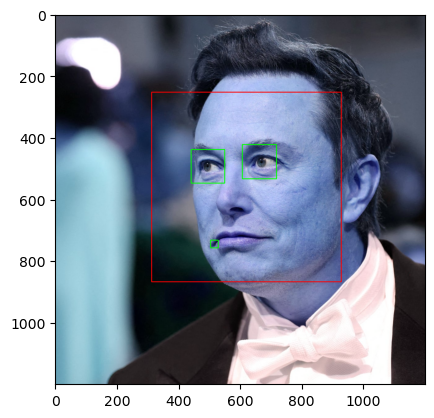

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),1)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()


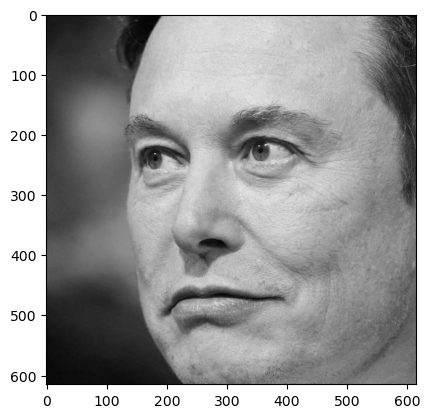

In [11]:
plt.imshow(roi_gray, cmap='gray')

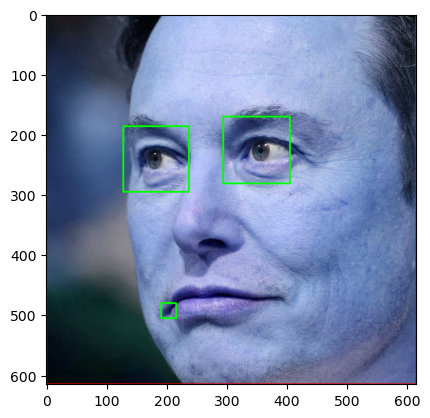

In [12]:
plt.imshow(roi_color, cmap='gray')

In [13]:
def get_cropped_img_2_eyes(image_path):
    img = cv2.imread(image_path)
    
    if img is None:
        print("Failed to read the image:", image_path)
        return None
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    if gray is None:
        print("Failed to convert image to grayscale:", image_path)
        return None
    
    # Rest of your code...
    faces= face_cascade.detectMultiScale(gray, 1.5, 3)
    for x, y, w, h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color

'''
def get_cropped_img_2_eyes(image_path):
    img= cv2.imread(image_path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
'''  
        
        

'\ndef get_cropped_img_2_eyes(image_path):\n    img= cv2.imread(image_path)\n    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)\n'

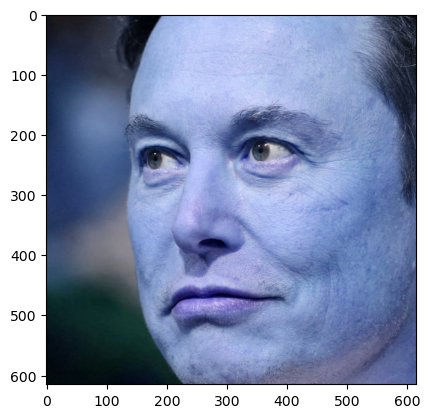

In [14]:
cropped_img= get_cropped_img_2_eyes("./test_images/elon.jpg")
plt.imshow(cropped_img)

In [15]:
path_to_data="./datasets/"
path_to_cr_data="./datasets/cropped_data/"

In [16]:
import os
img_dirs= []
#scan dataset directory 
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
    

In [17]:
img_dirs

['./datasets/Elon_Musk',
 './datasets/jack_ma',
 './datasets/mark_zuckerberg',
 './datasets/stev_jobs',
 './datasets/sundar_pichai']

In [18]:
import shutil
# After fiding subdirectories, out them into the new cropped_data folder
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [19]:
cropped_img_dirs= []
celebrity_file_names_dict= {}
for img_dir in img_dirs:
    count=1
    celebrity_name= img_dir.split('/')[-1] #take just the name of the file after /
    print( celebrity_name)
    
    celebrity_file_names_dict[celebrity_name]= []
    
    for entry in os.scandir(img_dir):
        roi_color=get_cropped_img_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder= path_to_cr_data + celebrity_name
            #if the cropped folder doesn't exist, create it
            if not os.path.exists(cropped_folder):
                os.mkdir(cropped_folder)
                cropped_img_dirs.append(cropped_folder)
                print("GENERATING CROPPED IMAGES IN CROPPEDFOLDER:", cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            #save the image into the cropped_file_path
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Elon_Musk
GENERATING CROPPED IMAGES IN CROPPEDFOLDER: ./datasets/cropped_data/Elon_Musk
Failed to read the image: ./datasets/Elon_Musk\Elon-Musk-Wants-Comedy-on-Twitter_-Can’t-Take-a-Joke-Alamy-2JACR0P.jpg
jack_ma
GENERATING CROPPED IMAGES IN CROPPEDFOLDER: ./datasets/cropped_data/jack_ma
mark_zuckerberg
GENERATING CROPPED IMAGES IN CROPPEDFOLDER: ./datasets/cropped_data/mark_zuckerberg
stev_jobs
GENERATING CROPPED IMAGES IN CROPPEDFOLDER: ./datasets/cropped_data/stev_jobs
sundar_pichai
GENERATING CROPPED IMAGES IN CROPPEDFOLDER: ./datasets/cropped_data/sundar_pichai


### Feature Engineering-> Wavelet transform

In [20]:
import pywt

In [21]:
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    #image normalization
    imArray /= 255;
    # compute coefficients 
    #Performs the 2D wavelet decomposition on the normalized image array using the specified wavelet mode and decomposition level. This step computes the wavelet coefficients at different scales.
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  #Converts the wavelet coefficients to a list format. The coefficients are returned as a tuple by default, and this step allows us to modify the coefficients.
    # Sets the approximation coefficients (the first element in coeffs_H) to zero. This effectively removes the low-frequency components from the image.
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

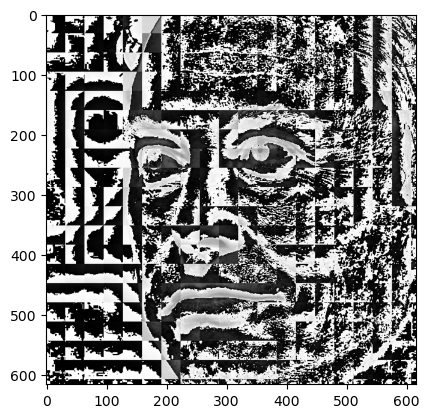

In [22]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

### You can see above a wavelet transformed image that gives clues on facial features such as eyes, nose, lips etc. This along with raw pixel image can be used as an input for our classifier

In [23]:
celebrity_file_names_dict

{'Elon_Musk': ['./datasets/cropped_data/Elon_Musk/Elon_Musk1.png',
  './datasets/cropped_data/Elon_Musk/Elon_Musk2.png',
  './datasets/cropped_data/Elon_Musk/Elon_Musk3.png',
  './datasets/cropped_data/Elon_Musk/Elon_Musk4.png',
  './datasets/cropped_data/Elon_Musk/Elon_Musk5.png',
  './datasets/cropped_data/Elon_Musk/Elon_Musk6.png',
  './datasets/cropped_data/Elon_Musk/Elon_Musk7.png',
  './datasets/cropped_data/Elon_Musk/Elon_Musk8.png',
  './datasets/cropped_data/Elon_Musk/Elon_Musk9.png',
  './datasets/cropped_data/Elon_Musk/Elon_Musk10.png',
  './datasets/cropped_data/Elon_Musk/Elon_Musk11.png',
  './datasets/cropped_data/Elon_Musk/Elon_Musk12.png',
  './datasets/cropped_data/Elon_Musk/Elon_Musk13.png',
  './datasets/cropped_data/Elon_Musk/Elon_Musk14.png',
  './datasets/cropped_data/Elon_Musk/Elon_Musk15.png',
  './datasets/cropped_data/Elon_Musk/Elon_Musk16.png',
  './datasets/cropped_data/Elon_Musk/Elon_Musk17.png',
  './datasets/cropped_data/Elon_Musk/Elon_Musk18.png',
  './d

In [56]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Elon_Musk': 0,
 'jack_ma': 1,
 'mark_zuckerberg': 2,
 'stev_jobs': 3,
 'sundar_pichai': 4}

In [57]:
X, y= [], []

for celebrity_name, training_files in  celebrity_file_names_dict.items():
    for training_image in training_files:
        img= cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img= cv2.resize(img, (32,32))
        #set wv transfomed to same size as the scaleed raw image
        img_har= w2d(img, 'db1', 5)
        scalled_img_har= cv2.resize(img_har, (32,32))
        #vertically stack the images: scalled raw img and the waveled scaled tranform image
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [58]:
len(X)

216

In [59]:
32*32*3 +32*32

4096

In [60]:
len(X[0]) #32*32*3 +32*32(wavelet)

4096

In [61]:
#convert X to float
X= np.array(X).reshape(len(X),4096).astype(float)
X.shape

(216, 4096)

In [62]:
X

array([[ 24.,  31.,  34., ...,  10.,   2.,  56.],
       [239., 195., 158., ..., 254., 254., 253.],
       [  0.,   0.,   0., ..., 123.,   0.,   0.],
       ...,
       [114., 113., 115., ..., 248., 247., 246.],
       [ 67.,  93.,  86., ...,  17.,  20.,  20.],
       [112., 146., 132., ...,  21.,  21.,  21.]])

### Model Building phase

In [63]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2000)

In [65]:
model= Pipeline([
    ('scaler', StandardScaler()),
    ('SVM', SVC(kernel='rbf', C=10)) # we just choose randomly these paramter to see the performance of the model
])
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7222222222222222

In [66]:
len(X_test)

54

In [67]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.53      0.80      0.64        10
           1       0.70      1.00      0.82        16
           2       0.83      0.38      0.53        13
           3       1.00      0.25      0.40         4
           4       1.00      0.82      0.90        11

    accuracy                           0.72        54
   macro avg       0.81      0.65      0.66        54
weighted avg       0.78      0.72      0.70        54



### Hyper Parameter Tuning

In [68]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline


In [69]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Define the model parameters
model_params = {
    'svm': {
        'model': SVC(gamma='auto', probability=True),
        'params': {
            'svc__C': [1, 10, 100, 1000],
            'svc__kernel': ['rbf', 'linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(random_state=2000),
        'params': {
            'randomforestclassifier__n_estimators': [5, 10,100]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'logisticregression__C': [1, 5, 10]
        }
    },
    'Xgboost': {
        'model': XGBClassifier(),
        'params': {
            'xgbclassifier__n_estimators': [50, 100, 200],
            'xgbclassifier__learning_rate': [0.1, 0.01, 0.001]
        }
    },
}



In [70]:
scores = []
best_estimators = {}

for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df


,model,best_score,best_params
0,svm,0.605114,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.580492,{'randomforestclassifier__n_estimators': 100}
2,logistic_regression,0.648295,{'logisticregression__C': 1}
3,Xgboost,0.519129,"{'xgbclassifier__learning_rate': 0.1, 'xgbclas..."


In [71]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.7037037037037037

In [85]:
best_estimators['svm'].score(X_test, y_test)


0.7037037037037037

In [82]:
best_estimators['Xgboost'].score(X_test, y_test)

0.6296296296296297

##### We can can conclude that Logistic Regression is the best algorithm for this problem

### Performance Metrics

In [86]:
best_clf=best_estimators['svm']

In [87]:
from sklearn.metrics import confusion_matrix

y_pred= best_clf.predict(X_test)
cm= confusion_matrix(y_test, y_pred )
cm

array([[ 8,  1,  1,  0,  0],
       [ 3, 13,  0,  0,  0],
       [ 2,  3,  7,  0,  1],
       [ 3,  0,  0,  1,  0],
       [ 0,  0,  0,  2,  9]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

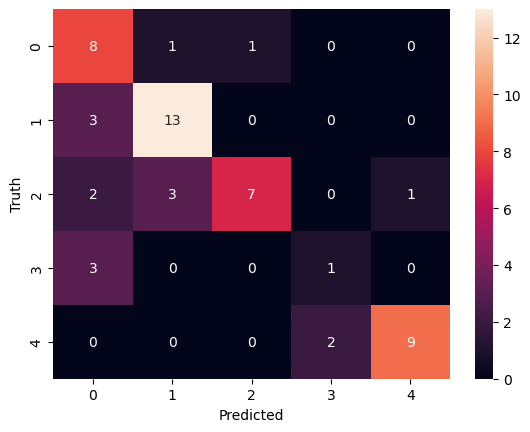

In [88]:
import seaborn as sns
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [89]:
!pip install joblib
import joblib

In [90]:
joblib.dump(clf, 'model_saved.pkl')

['model_saved.pkl']

In [91]:
class_dict

{'Elon_Musk': 0,
 'jack_ma': 1,
 'mark_zuckerberg': 2,
 'stev_jobs': 3,
 'sundar_pichai': 4}

In [92]:
import json
with open("class_dictionnary.json", "w") as f:
    f.write(json.dumps(class_dict))